In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
from sklearn_som.som import SOM
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('full_data.csv', engine= 'python')

for c in df.columns[1:]:
    if c == 'TissueTypePrediction':
        break
    if not is_numeric_dtype(df[c]):
        #print(c)
        df[c] = df[c].apply(lambda x: float(x.split()[0].replace(',','.')))

In [43]:
PATIENT_NUM = 4
Som_M = 4
Som_N = 4

In [44]:
dfn = df._get_numeric_data()
normalized_df=(dfn-dfn.min())/(dfn.max()-dfn.min())

typelist = df[df['Patient'] == PATIENT_NUM]['Status.simple'].unique()
mask =  (df['Patient'] == PATIENT_NUM)
df1 = normalized_df[mask]

#df1 = normalized_df

col = ["ROInr","Cell_Area","Nucl_Area","X80ArAr_Mean","sSMA113_Mean","aSMA_Mean","X124Xe_Mean","X127I_Mean","X129Xe_Mean","X132Xe_Mean","RORgt_Mean","Ecad_Mean","CD20_Mean","GATA3_Mean","GATA3_Nucl_Mean","Tbet_Mean","Tbet_Nucl_Mean","CD16_Mean","BetaCatenin_Mean","PanKeratin_Mean","CTLA4_Mean","PDL1_Mean","IFNg_Mean","CD45RO_Mean","AKT_Mean","HLA_DR-DP-DQ_Mean","FOXP3_Mean","FOXP3_Nucl_Mean","CD4_Mean","CD103_Mean","pSTAT3_Mean","CD68_Mean","IL10_Mean","CD45_Mean","CD8a_Mean","ICOS_Mean","pS6_Mean","PD1_Mean","NFkB_Mean","NFkB_Nucl_Mean","IL17a_Mean","Ki67_Mean","Ki67_Nucl_Mean","GranzymeB_Mean","CD3_Mean","pERK_Mean","Cleaved Caspase 3_Mean","ERK_Mean","TCRgd_Mean","pAKT_Mean","H3_Mean","H3_Nucl_Mean","Ir193_Mean","Ir193_Nucl_Mean"]
df2 = df1[col]
iris_som = SOM(m=Som_M, n=Som_N, dim=54)
iris_som.fit(np.array(df2),epochs=1000)

for i in range(len(typelist)):
    df3 = normalized_df[df['Status.simple'] == typelist[i]][col]
    predictions = iris_som.predict(np.array(df3))
    
    print(typelist[i])
    for j in range(Som_M*Som_N):
        amount = list(predictions).count(j+1)
        percentage = amount/len(list(predictions))*100
        print(f"{j+1} : {percentage} %")
    #print(predictions)

Uninflamed
1 : 0.12803174743936505 %
2 : 0.0 %
3 : 0.0 %
4 : 0.9311399813772004 %
5 : 0.02826674943466501 %
6 : 0.004433999911320002 %
7 : 0.0 %
8 : 17.58080964838381 %
9 : 6.059060878818783 %
10 : 0.7249589855008203 %
11 : 0.0 %
12 : 20.476765840464683 %
13 : 31.209816875803664 %
14 : 19.303418613931626 %
15 : 1.1772269764554606 %
16 : 0.0 %
Inflamed
1 : 4.795286166110654 %
2 : 1.8118799012174516 %
3 : 9.712750747367965 %
4 : 6.336813829556778 %
5 : 2.479961873402366 %
6 : 6.503184437416057 %
7 : 4.771890299380443 %
8 : 8.55162254668342 %
9 : 7.353234261947056 %
10 : 14.732463931372125 %
11 : 8.017850179801568 %
12 : 0.1672371214418786 %
13 : 1.1022052770677182 %
14 : 11.723928772583509 %
15 : 8.113166673887614 %
16 : 0.0 %
Dysplastic
1 : 1.013193900491338 %
2 : 0.0 %
3 : 0.0 %
4 : 5.98964426314558 %
5 : 1.3244763638953032 %
6 : 0.31840330407006906 %
7 : 0.0 %
8 : 10.935576737230807 %
9 : 2.130148622117331 %
10 : 4.638719062490463 %
11 : 1.3875466669379368 %
12 : 24.99415073802427 %
1

C:\Users\Jan Super\AppData\Local\Temp\ipykernel_21600\3489469856.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df['ImageNumber'] == IMAGE]


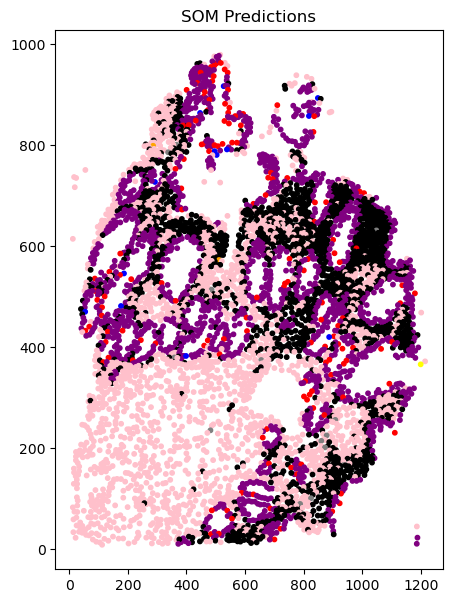

In [45]:
# Uninflamed - 20210805_MBAA047_S7_R-5_D-S7_T36_R2
# Dysplastic - 20210808_MBAA047_S8_R-6_D-S8_T42_R1a
# Inflamed   - 20210805_MBAA047_S7_R-6_D-S7_T37_R1

IMAGE = '20210805_MBAA047_S7_R-6_D-S7_T37_R1'

df3 = df2[df['ImageNumber'] == IMAGE]
predictions = iris_som.predict(np.array(df3))

ig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,7))
x = df[df['ImageNumber'] == IMAGE]['cx']
y = df[df['ImageNumber'] == IMAGE]['cy']
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'black', 'gray', 'orange', 'pink']

ax.scatter(x, y, c=predictions, cmap=ListedColormap(colors), s=10)
ax.title.set_text('SOM Predictions')

plt.show()